In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline
from rubin_sim.photUtils import Dust_values

In [2]:
baseline_file = get_baseline()
opsim = os.path.basename(baseline_file).replace('.db','')

In [3]:
bundle_list = []
slicer = maf.HealpixSlicer()
metric = maf.DcrPrecisionMetric()
sql = ''
plotDict = {"percentileClip": 95.0}
bundle = maf.MetricBundle(
        metric,
        slicer,
        sql, runName=opsim, plotDict=plotDict)
bundle_list.append(bundle)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying table None with no constraint for columns ['observationStartLST', 'fiveSigmaDepth', 'fieldDec', 'fieldRA', 'rotSkyPos', 'paraAngle', 'altitude', 'filter', 'seeingFwhmGeom'].
Found 2086980 visits
Running:  ['baseline_v2_0_10yrs_DCRprecision_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/stackers/baseStacker.py:132: UserWarning: Warning - column zenithDistance already present in simData, may be overwritten (depending on stacker).
  warnings.warn(


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


0.0 180.0 -180.0 180.0
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 14804 bins, returning 200
  warnings.warn(


Plotting complete.


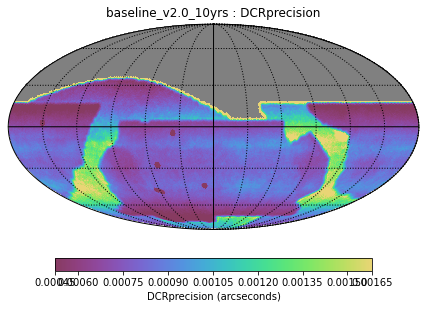

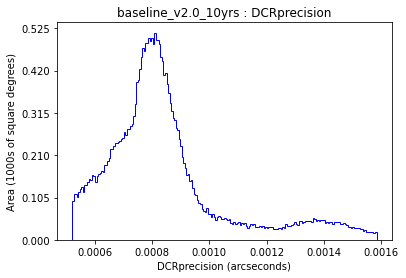

In [4]:
bd = maf.makeBundlesDictFromList(bundle_list)
group = maf.MetricBundleGroup(bd, baseline_file, 'temp')
group.runAll()
group.plotAll(closefigs=False)